<a href="https://colab.research.google.com/github/smartfarmer1997/first-repository/blob/master/%ED%86%B5%EA%B3%84_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_1%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.stats import shapiro

In [141]:
or_df_sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
or_df_sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [142]:
or_df_sheet1

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [143]:
or_df_sheet2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [144]:
or_df = pd.concat([or_df_sheet1, or_df_sheet2], ignore_index=True)

In [251]:
or_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total,Quarter,InvoiceMonth,cohort_Quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4,2009Q4,2009-12,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009Q4,2009-12,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009Q4,2009-12,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8,2009Q4,2009-12,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0,2009Q4,2009-12,2009Q4


- `InvoiceNo`: 송장 번호. 명목. 각 거래에 고유하게 할당된 6자리 정수. 이 코드가 'c'로 시작하면 취소를 나타냅니다.
- `StockCode`: 제품(품목) 코드. 명목. 각 제품에 고유하게 할당된 5자리 정수.
- `Description`: 제품(품목) 이름. 명목.
- `Quantity`: 거래당 각 제품(품목)의 수량. 숫자.
- `InvoiceDate`: 송장 날짜 및 시간. 숫자. 거래가 생성된 날짜와 시간.
- `UnitPrice`: 단가. 숫자. 단위당 제품 가격(파운드).
- `CustomerID`: 고객 번호. 명목. 각 고객에게 고유하게 할당된 5자리 정수.
- `Country`: 국가명. 명목. 고객이 거주하는 국가명.

# 문제 1: 데이터 로드 및 탐색
- **데이터의 첫 5개 행을 출력**하여 데이터 형식을 확인하세요.
- **데이터프레임의 컬럼 정보**와 **결측치 여부**를 확인하고 전처리 전략을 고민해보세요.

In [146]:
# 데이터의 첫 5개 행을 출력하여 데이터 형식을 확인하세요
or_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [147]:
# 데이터프레임의 컬럼 정보와 결측치 여부를 확인하고 전처리 전략을 고민해보세요.
or_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


## 탐색이 필요한 부분
- Quantity가 너무 낮은 행

- Quantity가 너무 높은 행

- Price가 너무 낮은 행

- Price가 너무 높은 행

In [148]:
# Quantity 높은 행 제거
or_df = or_df[or_df['Quantity'] < 20000]

In [149]:
# Price 가 0인 행 제거
or_df = or_df[or_df['Price'] != 0]

In [150]:
or_df[or_df.isnull().any(axis=1)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [151]:
or_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


# **문제 2: 데이터 전처리**

- **`InvoiceDate`** 컬럼을 날짜 형식으로 변환하고, **`Customer ID`**에 결측치가 있는 행을 제거하세요.
- **`Customer ID`**를 정수형으로 변환한 후, **`InvoiceDate`**를 기준으로 데이터를 정렬하세요.
- 금액을 나타내는 새로운 컬럼 **`Total`** 을 생성하세요 (`Quantity`와 `Price`를 곱한 값).

In [152]:
# InvoiceDate 컬럼을 날짜 형식으로 변환하시오.

or_df['InvoiceDate_DT'] = pd.to_datetime(or_df['InvoiceDate'])

In [153]:
or_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1061167 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Invoice         1061167 non-null  object        
 1   StockCode       1061167 non-null  object        
 2   Description     1061167 non-null  object        
 3   Quantity        1061167 non-null  int64         
 4   InvoiceDate     1061167 non-null  datetime64[ns]
 5   Price           1061167 non-null  float64       
 6   Customer ID     824291 non-null   float64       
 7   Country         1061167 non-null  object        
 8   InvoiceDate_DT  1061167 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 81.0+ MB


In [154]:
# Customer ID에 결측치가 있는 행을 제거하세요.

or_df = or_df.dropna(subset=['Customer ID'])
or_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824291 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         824291 non-null  object        
 1   StockCode       824291 non-null  object        
 2   Description     824291 non-null  object        
 3   Quantity        824291 non-null  int64         
 4   InvoiceDate     824291 non-null  datetime64[ns]
 5   Price           824291 non-null  float64       
 6   Customer ID     824291 non-null  float64       
 7   Country         824291 non-null  object        
 8   InvoiceDate_DT  824291 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 62.9+ MB


In [155]:
# Customer ID를 정수형으로 변환한 후, InvoiceDate를 기준으로 데이터를 정렬하세요.

or_df['Customer ID'] = or_df['Customer ID'].astype(int)
or_df = or_df.sort_values(by='InvoiceDate')

<ipython-input-155-243c0102ef09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_df['Customer ID'] = or_df['Customer ID'].astype(int)


In [156]:
or_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824291 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Invoice         824291 non-null  object        
 1   StockCode       824291 non-null  object        
 2   Description     824291 non-null  object        
 3   Quantity        824291 non-null  int64         
 4   InvoiceDate     824291 non-null  datetime64[ns]
 5   Price           824291 non-null  float64       
 6   Customer ID     824291 non-null  int64         
 7   Country         824291 non-null  object        
 8   InvoiceDate_DT  824291 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 62.9+ MB


In [157]:
or_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00
...,...,...,...,...,...,...,...,...,...
1067357,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00
1067356,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680,France,2011-12-09 12:50:00
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-09 12:50:00
1067361,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680,France,2011-12-09 12:50:00


In [158]:
# 금액을 나타내는 새로운 컬럼 Total 을 생성하세요 (Quantity와 Price를 곱한 값).

or_df['Total'] = or_df['Quantity'] * or_df['Price']

In [159]:
or_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,InvoiceDate_DT,Total
count,824291.000000,824291,824291.000000,824291.000000,824291,824291.000000
mean,12.209479,2011-01-01 22:26:57.758655488,3.677121,15324.736611,2011-01-01 22:26:57.758655488,19.899088
min,-80995.000000,2009-12-01 07:45:00,0.001000,12346.000000,2009-12-01 07:45:00,-168469.600000
25%,2.000000,2010-07-06 11:58:00,1.250000,13975.000000,2010-07-06 11:58:00,4.250000
50%,5.000000,2010-12-03 14:26:00,1.950000,15257.000000,2010-12-03 14:26:00,11.250000
75%,12.000000,2011-07-27 15:14:00,3.750000,16797.000000,2011-07-27 15:14:00,19.500000
max,19152.000000,2011-12-09 12:50:00,38970.000000,18287.000000,2011-12-09 12:50:00,38970.000000
std,144.527200,NaN,70.244490,1697.432728,NaN,231.619339


# **문제 3: 나라별 구매 인원 시각화**

- **`Country`** 컬럼을 기준으로 **`Customer ID`**의 유니크한 값을 계산하여 나라별 구매 고객 수를 시각화 해보세요

In [160]:
 # help(sns.barplot)
or_df[or_df['Country'] == 'United Kingdom']

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.00
...,...,...,...,...,...,...,...,...,...,...
1067330,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,2011-12-09 12:31:00,4.68
1067354,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113,United Kingdom,2011-12-09 12:49:00,70.80
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,2011-12-09 12:49:00,214.80
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,2011-12-09 12:49:00,23.60


<ipython-input-161-a9885f054e31>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(country_customer_nunique, palette='rainbow')


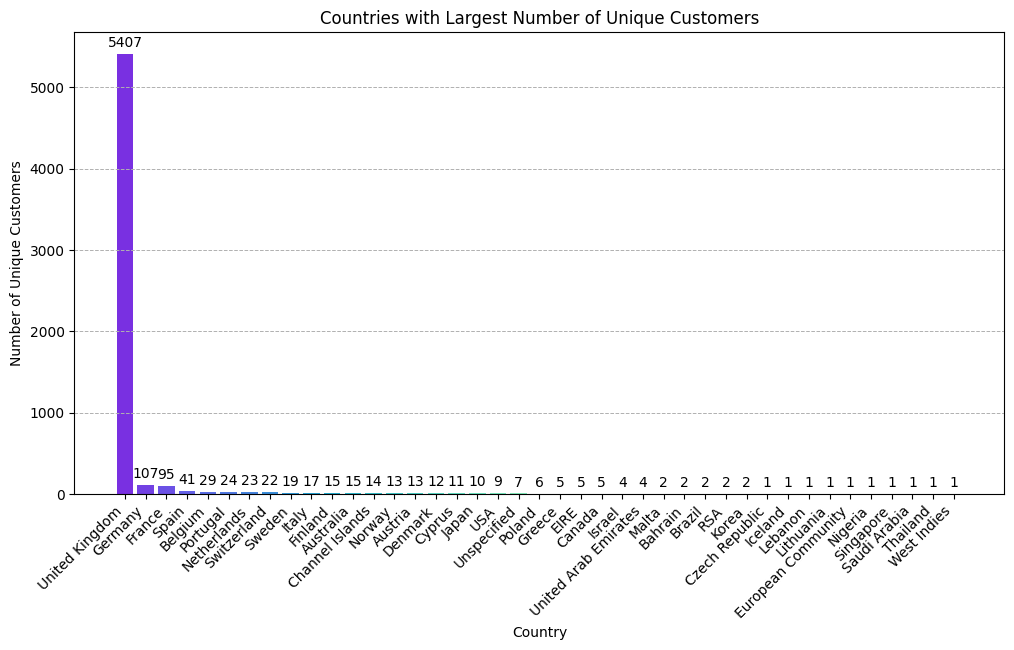

In [161]:
country_customer_nunique = or_df.groupby('Country')['Customer ID'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(country_customer_nunique, palette='rainbow')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

ax.margins(x=0.05)
plt.title('Countries with Largest Number of Unique Customers')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# **문제 4: Acquisition (고객 유입 분석)**

- 신규 고객 분석을 위해 고객의 **첫 구매 시점**을 기준으로 월별 신규 유입 고객 수를 계산하세요.
- 각 고객의 첫 구매 날짜를 추출하고, **월별 신규 고객 수**를 시각화하세요.

In [162]:
first_purchase = or_df.groupby('Customer ID')['InvoiceDate_DT'].min().sort_values(ascending=False)

In [177]:
first_purchase

,InvoiceDate_DT
Customer ID,
12713,2011-12-09 12:16:00
13298,2011-12-08 13:11:00
15520,2011-12-08 10:58:00
13436,2011-12-08 10:33:00
15195,2011-12-07 12:20:00
...,...
12682,2009-12-01 09:28:00
18102,2009-12-01 09:24:00
15362,2009-12-01 09:08:00


In [163]:
first_purchase_month = first_purchase.dt.to_period('M')

In [164]:
first_purchase_month.info()

<class 'pandas.core.series.Series'>
Index: 5939 entries, 12713 to 13085
Series name: InvoiceDate_DT
Non-Null Count  Dtype    
--------------  -----    
5939 non-null   period[M]
dtypes: period[M](1)
memory usage: 92.8 KB


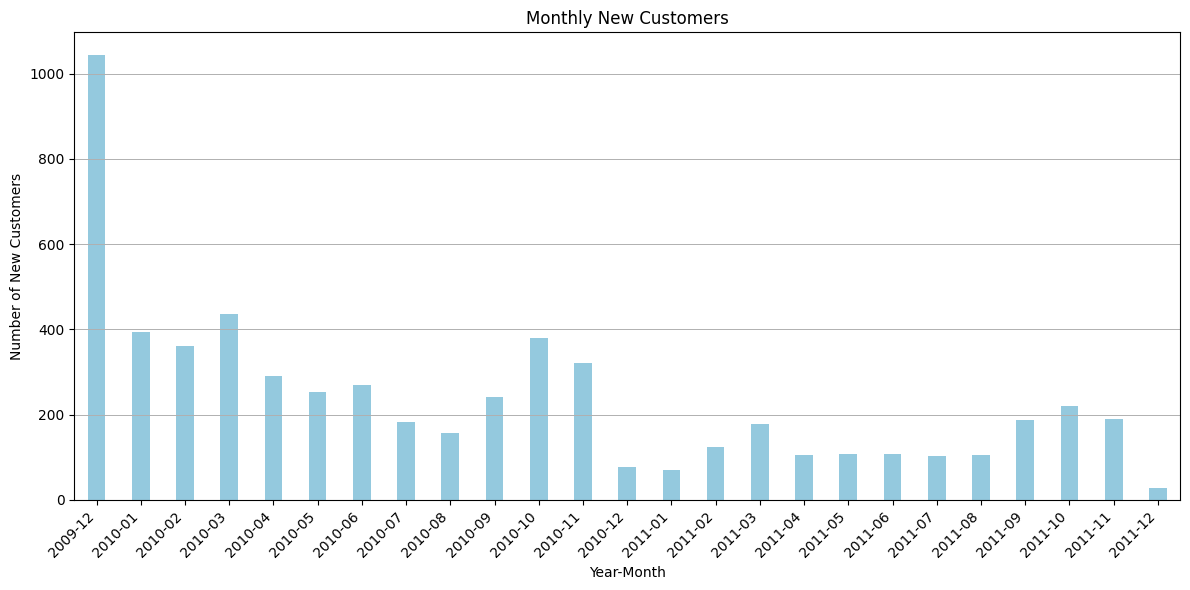

In [231]:
new_customers_per_month = first_purchase_month.value_counts().sort_index()


plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=new_customers_per_month.index.astype(str),
    y=new_customers_per_month.values,
    width=0.4,
    color='skyblue'
)
ax.set_title('Monthly New Customers')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Number of New Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='-', linewidth=0.7)
plt.tight_layout()
plt.show()

# **문제 5: Activation (고객 활성화 분석)**

- 모든 고객 중 첫 구매 이후 **총 구매 금액이 특정 기준 금액 (£50)** 이상인 고객을 활성화된 고객으로 정의합니다.
- 전체 고객 수와 활성화된 고객 수를 비교하여 **활성화율**을 도출하세요.

In [166]:
# 모든 고객 중 첫 구매 이후 총 구매 금액이 특정 기준 금액 (£50) 이상인 고객을 활성화된 고객으로 정의합니다.

customer_total_bill = or_df.groupby('Customer ID')['Total'].sum().sort_values()

customer_total_bill_count = customer_total_bill.count()
customer_total_50bill_count = customer_total_bill[customer_total_bill >= 50].count()
customer_total_bill_activation_rate = customer_total_50bill_count / customer_total_bill_count * 100

print('총 고객 수: {:.0f}'.format(customer_total_bill_count))
print('활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): {:.0f}'.format(customer_total_50bill_count))
print('고객 활성화율: {:.2f}%'.format(customer_total_bill_activation_rate))

총 고객 수: 5939
활성화된 고객 수 (첫 구매 후 £50 이상 지출한 고객): 5777
고객 활성화율: 97.27%


# **문제 6: Retention:코호트 분석(고객)**

- 분기별 활성 사용자(MAU)를 분석하여 고객 유지 현황을 파악하세요.
- 분기별 활성 고객 수를 계산하고, 이를 시각화하여 **고객 유지 트렌드**를 분석하세요.

In [167]:
pd.to_datetime(or_df['InvoiceDate_DT']).dt.to_period('Q')

,InvoiceDate_DT
0,2009Q4
1,2009Q4
2,2009Q4
3,2009Q4
4,2009Q4
...,...
1067357,2011Q4
1067356,2011Q4
1067369,2011Q4
1067361,2011Q4


In [168]:
or_df['Invoice'] = or_df['Invoice'].astype(str)

In [169]:
or_df = or_df[~or_df['Invoice'].str.startswith('C')]

In [170]:
or_df['Quarter'] = or_df['InvoiceDate_DT'].dt.to_period('Q')

<ipython-input-170-0e7481ae8d9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_df['Quarter'] = or_df['InvoiceDate_DT'].dt.to_period('Q')


In [234]:
or_df['cohort_Quarter'] = or_df.groupby('Customer ID')['Quarter'].transform('min')

<ipython-input-234-628c81bf41fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_df['cohort_Quarter'] = or_df.groupby('Customer ID')['Quarter'].transform('min')


In [255]:
or_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceDate_DT,Total,Quarter,InvoiceMonth,cohort_Quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,2009-12-01 07:45:00,83.4,2009Q4,2009-12,2009Q4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009Q4,2009-12,2009Q4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,2009-12-01 07:45:00,81.0,2009Q4,2009-12,2009Q4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,2009-12-01 07:45:00,100.8,2009Q4,2009-12,2009Q4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,2009-12-01 07:45:00,30.0,2009Q4,2009-12,2009Q4


In [171]:
quarterly_mau = or_df.groupby('Quarter')['Customer ID'].nunique().reset_index()

In [256]:
def quarters_diff(df, col1, col2):
    current_quarter_idx = df[col1].apply(lambda x: x.year * 4 + x.quarter)
    cohort_quarter_idx = df[col2].apply(lambda x: x.year * 4 + x.quarter)
    return (current_quarter_idx - cohort_quarter_idx) // 4

or_df['QuarterDiff'] = quarters_diff(or_df, 'Quarter', 'cohort_Quarter')

<ipython-input-256-ebe3f3f0bb16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_df['QuarterDiff'] = quarters_diff(or_df, 'Quarter', 'cohort_Quarter')


In [263]:
or_df['cohort_index'] = quarters_diff(or_df, 'Quarter', 'cohort_Quarter')

cohort_counts = or_df.groupby(['cohort_Quarter', 'cohort_index'])['Customer ID'].nunique()
cohort_counts_df = cohort_counts.to_frame().rename(columns={'Customer ID': 'users'}).sort_values(by=['cohort_Quarter'])
cohort_counts_df['retention_rate'] = cohort_counts_df['users'] / cohort_counts_df.groupby(['cohort_Quarter'])['users'].transform('max')
cohort_counts_df

<ipython-input-263-f6e9320c3b29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_df['cohort_index'] = quarters_diff(or_df, 'Quarter', 'cohort_Quarter')


users  retention_rate
cohort_Quarter cohort_index                       
2009Q4         0               955        1.000000
               1               771        0.807330
               2               535        0.560209
2010Q1         0              1200        1.000000
               1               763        0.635833
2010Q2         0               818        1.000000
               1               430        0.525672
2010Q3         0               591        1.000000
               1               267        0.451777
2010Q4         0               778        1.000000
               1               271        0.348329
2011Q1         0               374        1.000000
2011Q2         0               325        1.000000
2011Q3         0               397        1.000000
2011Q4         0               440        1.000000

In [264]:

# plt.figure(figsize=(12, 8))
# heatmap = sns.heatmap(
#     data=cohorts_pivot,
#     annot=True,                # 셀 내부에 값 표시
#     fmt='.2f',                 # 텍스트 형식 (소수점 2자리)
#     cmap='Greens',             # 색상 팔레트
#     cbar_kws={'label': 'Retention Rate, %'},  # 컬러바 제목
#     linewidths=0.5,            # 셀 간격
#     linecolor='gray',          # 셀 경계 색상
#     vmin=0, vmax=100           # Retention Rate의 범위 설정
# )

# **문제 7: Retention: 코호트 분석(평균 구매수량)**

- 분기단위의 활성 사용자의 평균 구매수량을 분석하세요
    - 구매수량이기 때문에 0 index의 값이 100% 가 아닌 절대 값임을 주의

# **문제 8: Revenue : ARPU**

- 각 고객의 월별 **구매 금액**을 집계하고, 이를 기반으로 **ARPU**를 분석하세요.

In [252]:
or_df['InvoiceMonth'] = or_df['InvoiceDate_DT'].dt.to_period('M')

<ipython-input-252-a1a72b64cfe8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  or_df['InvoiceMonth'] = or_df['InvoiceDate_DT'].dt.to_period('M')


In [253]:
InvoiceMonth_total = or_df.groupby('InvoiceMonth')['Total'].sum()

In [254]:
InvoiceMonth_total

,Total
InvoiceMonth,
2009-12,686654.160
2010-01,557319.062
2010-02,506371.066
2010-03,699608.991
2010-04,594609.192
2010-05,599985.790
2010-06,639066.580
2010-07,591636.740
2010-08,604242.650


In [200]:
InvoiceMonth_uniquecustomer_count = or_df.groupby('InvoiceMonth')['Customer ID'].nunique()

In [203]:
arpu = InvoiceMonth_total / InvoiceMonth_uniquecustomer_count

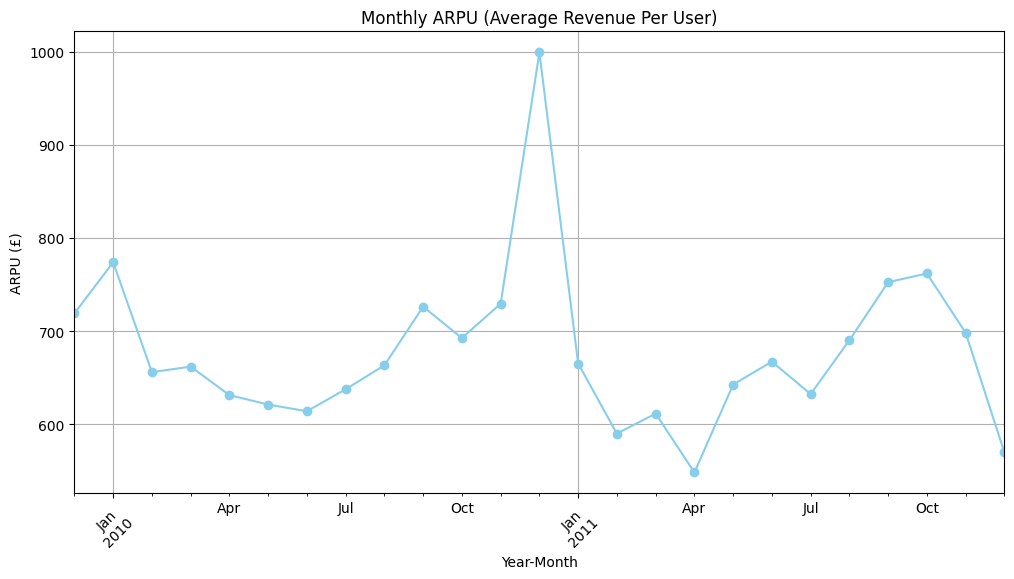

In [204]:
#시각화코드
plt.figure(figsize=(12, 6))
arpu.plot(kind='line', marker='o', color='skyblue')
plt.title("Monthly ARPU (Average Revenue Per User)")
plt.xlabel("Year-Month")
plt.ylabel("ARPU (£)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# **문제 9: Revenue(CLV)**

- 고객 생애 가치를 예측하기 위해 **CLV**를 계산하고 표로 CLV기준으로 내림차순으로 정렬해보세요
- **CLV 식: 평균금액 x  평균 구매 빈도 x 고객유지기간**(단, Invoce Date의 최대 최소를 빼준 뒤 1을 더해주기)

# 기초통계 문제

## 문제10
- 어떤 회사의 고객 대기시간은 5분에서 15분 사이의 균등분포를 따릅니다. 고객 100명이 대기한 시간을 시뮬레이션하고, 평균 대기시간과 표준편차를 계산하세요.

In [225]:
from scipy.stats import uniform

user_count = 100

waiting_times = uniform.rvs(loc=5, scale=10, size=user_count, random_state=42)

mean_waiting_time = np.mean(waiting_times)
std_waiting_time = np.std(waiting_times, ddof=1)


print(f"평균 대기시간: {mean_waiting_time:.2f}")
print(f"표준편차: {std_waiting_time:.2f}")

평균 대기시간: 9.70
표준편차: 2.97


## 문제11

- 한 신제품의 초기 성공 확률이 0.3이라고 가정합니다. 10회의 시뮬레이션에서 성공한 횟수를 구하고, 각 성공 여부를 출력하세요.

In [214]:
from scipy.stats import bernoulli

p = 0.3
n = 10

outcomes = bernoulli.rvs(p, size=n)
success_count = outcomes.sum()

print(f"각 시도 결과: {outcomes}")
print(f"성공 횟수: {success_count}")

각 시도 결과: [0 0 0 0 0 0 1 0 0 1]
성공 횟수: 2


## 문제12

- 한 수업에서 학생 20명이 5문제로 구성된 퀴즈를 치릅니다. 각 문제의 정답 확률은 0.7이라고 가정할 때, 각 학생이 맞힌 점수를 시뮬레이션하고, 전체 학생의 평균 점수를 계산하세요.

In [222]:
from scipy.stats import binom

num_of_stds = 20
num_of_quizzes = 5
percent = 0.7

scores = binom.rvs(num_of_quizzes, p = percent, size=num_of_stds, random_state=42)
average_score = np.mean(scores)

print(f"학생별 점수: {scores}")
print(f"평균 점수: {average_score:.2f}")

학생별 점수: [4 2 3 3 5 5 5 2 3 3 5 1 3 4 4 4 4 4 4 4]
평균 점수: 3.60


## 문제13

- 한 공장에서 생산되는 제품의 무게는 평균 50g, 표준편차 5g의 정규분포를 따릅니다.1000개의 제품 무게를 시뮬레이션하고, 무게가 45g 이상 55g 이하인 제품의 비율을 계산(변수명: `within_range`)하세요. 무게 분포의 히스토그램을 그리세요.

In [229]:
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 50
sigma = 5
num_of_samples = 1000

weights = norm.rvs(loc=mu, scale=sigma, size=num_of_samples, random_state=42)

conds = (weights >= 45) & (weights <=55)

within_range = len(weights[conds]) / len(weights) * 100
print(f"45g 이상 55g 이하의 비율: {within_range:.2f}%")

45g 이상 55g 이하의 비율: 69.80%


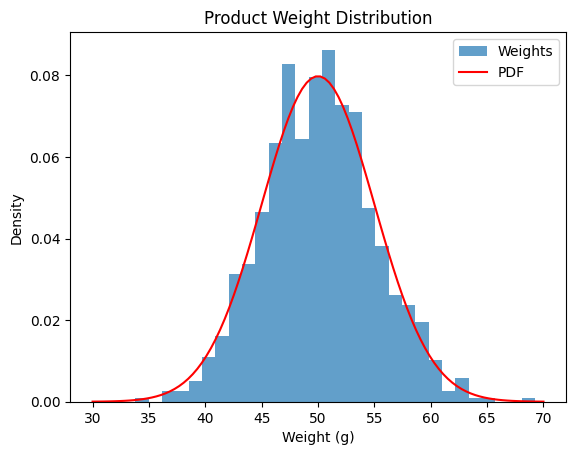

In [230]:
plt.hist(weights, bins=30, density=True, alpha=0.7, label="Weights")
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', label="PDF")
plt.xlabel("Weight (g)")
plt.ylabel("Density")
plt.title("Product Weight Distribution")
plt.legend()
plt.show()

# KPT 회고
Keep : 최대한 지피티 없이 하려고 했다.

Problem : 예시 문제들 풀때는 이해했다고 생각했는데 시간이 조금 지났다고 까먹은건지 제대로 이해를 못한건지 제대로 못풀었다.

Try : AARRR 문제 다시 보자.